<a href="https://colab.research.google.com/github/witkov/research-projects/blob/master/fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

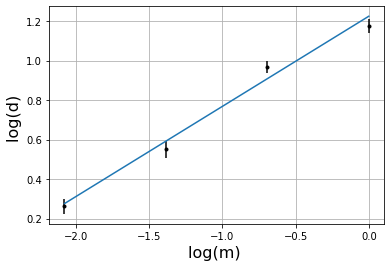

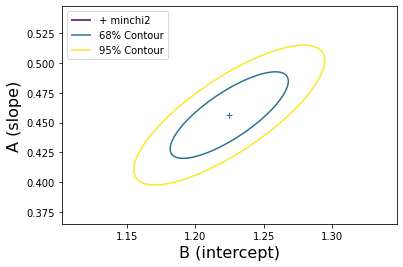

CHI-SQUARED ANALYSIS RESULTS
A_best = 0.46
fractal dimension = 2.19
B_best = 1.22
minchi2 = 7.35
N = 4
minchi2 good fit range = [ 1.17 , 6.83 ]


In [2]:
# 2dchi2.py version 5/12/20
# This script does chi-square curve fitting to the 2-parameter linear model y = Ax + B
#
# Three arrays are needed:
    # x is an array of mean values for the independent variable
    # y is an array of mean values for the dependent variable
    # y_err is an array of standard errors (SD/(sqrt of N)) for y
#
# This script assumes errors on the dependent (y) variable only.
#
# SOFTWARE DEPENDENCIES: Numpy, Matplotlib
# ---------------------------------------------------------------------------
# Copyright (C) 2020 Carey Witkov and Keith Zengel

# This program is free software: you can redistribute it and/or modify it under 
# the terms of the GNU General Public License as published by the Free Software 
# Foundation; either version 3 of the License, or (at your option) any later version.

# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
# See the GNU General Public License for more details.

# You should have received a copy of the GNU General Public License along with this program. 
# If not, see https://www.gnu.org/licenses/.
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

# relative mass of crumpled paper ball
m = np.array([1, 0.5, 0.25, 0.125])

# Radii of crumpled paper balls
r1 = np.array([3.1, 3.1, 3.5])
r2 = np.array([2.8, 2.6, 2.5])
r3 = np.array([1.9, 1.7, 1.6])
r4 = np.array([1.4, 1.3, 1.2])

r = np.array([mean(r1), mean(r2), mean(r3), mean(r4)])
N = len(r)
sigma_r=np.array([np.std(r1, ddof=1), np.std(r2, ddof=1), np.std(r3, ddof=1), np.std(r4, ddof=1)]/np.sqrt(N));

# x,y data arrays and y-error array
x = log(m);
y = log(r); 
yerr = sigma_r/r;

# calculate sums needed to obtain chi-square
Syy=sum(y**2/yerr**2)
Sxx=sum(x**2/yerr**2)
S0=sum(1/yerr**2)
Sxy=sum((y*x)/yerr**2)
Sy=sum(y/yerr**2)
Sx=sum(x/yerr**2)

Abest = (S0*Sxy - Sx*Sy)/(S0*Sxx - (Sx*Sx))
Bbest = (Sy*Sxx - Sx*Sxy)/(S0*Sxx - (Sx*Sx))
minchi2 = Syy+(S0*(Sxy*Sxy) - 2*Sx*Sy*Sxy + Sxx*(Sy*Sy))/((Sx*Sx) - (S0*Sxx))
sigmaA = 1/sqrt(Sxx)
sigmaB = 1/sqrt(S0)

# create parameter grid
a = np.linspace(Abest-0.2*Abest,Abest+0.2*Abest,500)
b = np.linspace(Bbest-0.2*Bbest,Bbest+0.2*Bbest,500)
A,B = np.meshgrid(a,b)

# calculate chi-square over parameter grid
chi2=(Syy) + (A**2)*(Sxx) + (B**2)*(S0) - 2*A*Sxy - 2*B*Sy + 2*A*B*Sx
     
# plot data with errorbars 
plt.figure()
plt.errorbar(x,y,yerr,linestyle='None',fmt='.k')
plt.xlabel('log(m) ',fontsize=16)
plt.ylabel('log(d) ',fontsize=16)
plt.grid(True)
# plt.title('y vs x data and line-of-best-fit', fontsize=16)
plt.plot(x,Abest*x+Bbest)

# plot chi-square in A-b parameter plane with 68% and 95% contours
plt.figure()
levels=[minchi2,minchi2+2.3,minchi2+6]
Z=plt.contour(B,A,chi2,levels)
plt.ylim(Abest-0.2*Abest,Abest+0.2*Abest)
plt.xlim(Bbest-0.1*Bbest,Bbest+0.1*Bbest)
plt.plot(Bbest,Abest,'+')
plt.ylabel('A (slope)',fontsize=16)
plt.xlabel('B (intercept)',fontsize=16)

# add legend
artists, labels = Z.legend_elements()
plt.legend(handles=artists, labels=["+ minchi2","68% Contour","95% Contour"], loc='upper left')
plt.show()

# display main results
print("CHI-SQUARED ANALYSIS RESULTS")
Abest_float = "{:.2f}".format(Abest)
fd = "{:.2f}".format(1/Abest)
print("A_best =",Abest_float)
print("fractal dimension =",fd)
Bbest_float = "{:.2f}".format(Bbest)
print("B_best =",Bbest_float)
minchi2_float = "{:.2f}".format(minchi2)
print("minchi2 =",minchi2_float)
print("N =", N)
N_min_float = "{:.2f}".format(N-sqrt(2*N))
N_max_float = "{:.2f}".format(N+sqrt(2*N))
print("minchi2 good fit range = [",N_min_float, ",",N_max_float,"]")
# contour68 = "{:.2f}".format(levels[1])
# print("chi2 for 68% Contour =", contour68)
# contour95 = "{:.2f}".format(levels[2])
# print("chi2 for 95% Contour =", contour95)
